In [158]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [159]:
from tensorflow.keras.datasets import imdb

In [160]:
(xtrain, ytrain), (xtest, ytest) = imdb.load_data(num_words = 10000)

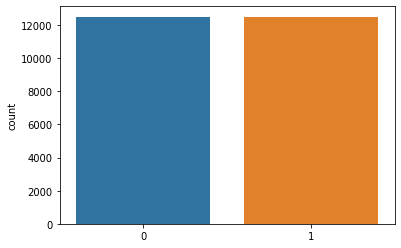

In [161]:
sns.countplot(ytrain)
plt.show()

In [162]:
def vectorize(x, dimension = 10000):
    results = np.zeros(shape=(len(x), dimension))
    for i in range(len(x)):
        for j in x[i]:
            results[i,j] = 1.
    return results

In [166]:
xtrain = vectorize(xtrain)
xtest  = vectorize(xtest)

In [167]:
ytrain  = np.asarray(ytrain, dtype = 'float32')
ytest   = np.asarray(ytest,  dtype = 'float32')

In [182]:
# Building the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 16, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 16, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1,  activation = 'sigmoid'))

In [183]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(), loss = tf.keras.losses.binary_crossentropy, metrics = ['accuracy'])

In [184]:
history = model.fit(xtrain, ytrain, epochs = 20, batch_size = 512, validation_split = 0.5)

Epoch 1/20
25/25 [==============================] - 3s 61ms/step - loss: 0.5486 - accuracy: 0.7520 - val_loss: 0.4111 - val_accuracy: 0.8626
Epoch 2/20
25/25 [==============================] - 1s 23ms/step - loss: 0.3297 - accuracy: 0.8943 - val_loss: 0.3200 - val_accuracy: 0.8836
Epoch 3/20
25/25 [==============================] - 1s 23ms/step - loss: 0.2384 - accuracy: 0.9218 - val_loss: 0.2935 - val_accuracy: 0.8836
Epoch 4/20
25/25 [==============================] - 1s 23ms/step - loss: 0.1818 - accuracy: 0.9456 - val_loss: 0.2926 - val_accuracy: 0.8842
Epoch 5/20
25/25 [==============================] - 1s 24ms/step - loss: 0.1478 - accuracy: 0.9540 - val_loss: 0.2918 - val_accuracy: 0.8865
Epoch 6/20
25/25 [==============================] - 1s 23ms/step - loss: 0.1206 - accuracy: 0.9656 - val_loss: 0.2943 - val_accuracy: 0.8854
Epoch 7/20
25/25 [==============================] - 1s 23ms/step - loss: 0.0984 - accuracy: 0.9732 - val_loss: 0.3083 - val_accuracy: 0.8848
Epoch 8/20
25

In [186]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [189]:
x = np.arange(1,21)

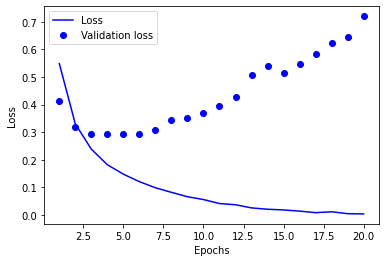

In [207]:
plt.plot(x, history.history['loss'], 'b', label='Loss')
plt.plot(x, history.history['val_loss'], 'bo', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

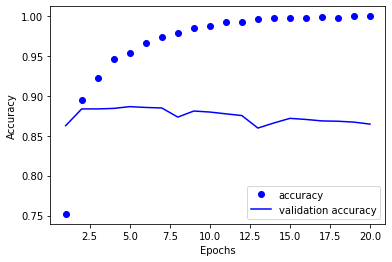

In [209]:
plt.plot(x, history.history['accuracy'], 'ob', label = 'accuracy')
plt.plot(x, history.history['val_accuracy'], 'b', label = 'validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()